In [1]:
import fsspec
from pathlib import Path
import os
import glob
from scipy.io import wavfile
import numpy as np
import shutil
import pandas as pd
pd.options.plotting.backend = "plotly"

In [2]:
%%time
# Clone the GitHub repo
print('cloning GitHub repo --- this may take a long time')
shutil.rmtree('good-vibrations', ignore_errors=True)   
os.system('git clone http://github.com/aubreymoore/good-vibrations.git')

cloning GitHub repo --- this may take a long time
CPU times: user 832 µs, sys: 4.46 ms, total: 5.3 ms
Wall time: 1min 1s


0

In [3]:
# Get a list of wavpaths
wavpathlist = sorted(glob.glob('good-vibrations/data/gpepp/*.wav'))
len(wavpathlist)

186

In [4]:
def maa(wavpath):
    '''Calculate mean absolute amplitude'''
    _, data = wavfile.read(wavpath)
    return np.mean(np.abs(data))

# maa(wavlist[10])

In [5]:
def get_timestamp(wavpath):
    '''Extract the timestamp from a wavpath'''
    return wavpath.split('/')[-1].split('.')[0]

In [6]:
%%time
# Build a pandas dataframe
mylist = []
for i, wavpath in enumerate(wavpathlist):
    mylist.append({'timestamp': get_timestamp(wavpath), 'maa': maa(wavpath)})
df = pd.DataFrame(mylist)
df

CPU times: user 74.3 ms, sys: 21.1 ms, total: 95.3 ms
Wall time: 102 ms


,timestamp,maa
0,2022-05-23T12:01:39,2331.508646
1,2022-05-23T12:11:51,159.958627
2,2022-05-23T12:21:58,900.848956
3,2022-05-23T12:32:04,86.770650
4,2022-05-23T12:42:11,1420.963217
...,...,...
181,2022-05-24T18:50:23,72.523925
182,2022-05-24T19:00:30,70.874152
183,2022-05-24T19:10:36,70.374823
184,2022-05-24T19:20:45,69.529990


In [7]:
# Remove the first recording because it contains unwanted background noise from human voices etc.
# df.drop(index=0, inplace=True)

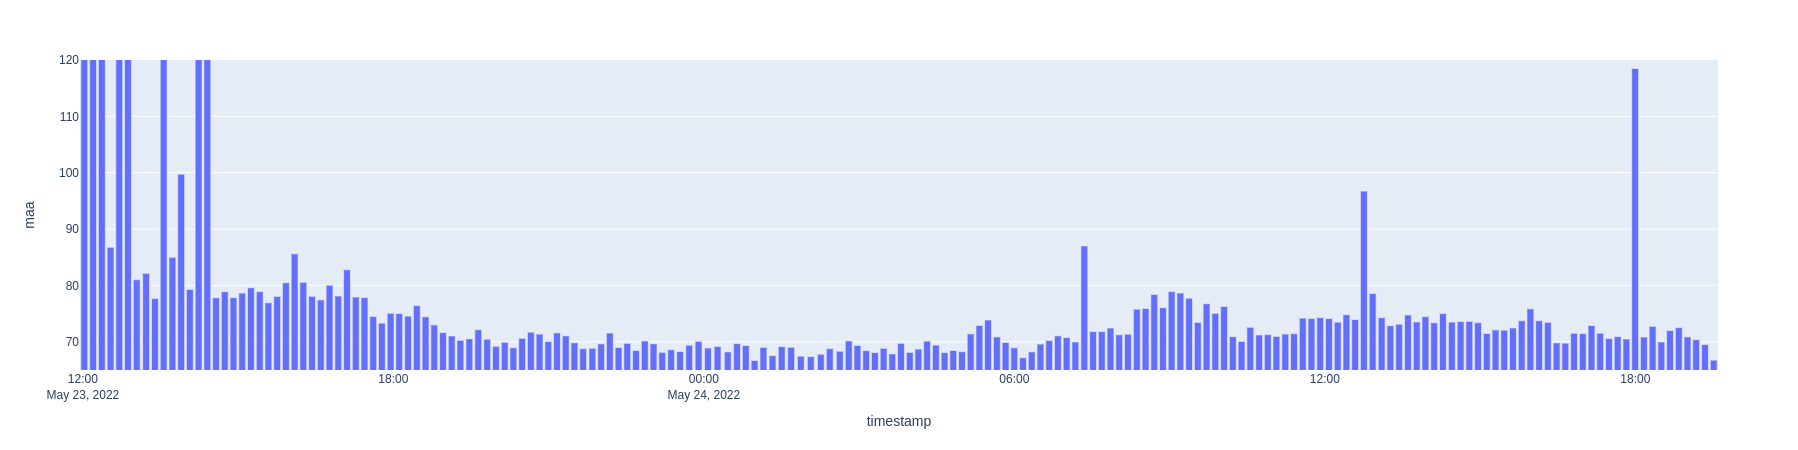

In [11]:
# plot maa vs timestamp
fig1 = df.plot.bar(x='timestamp', y='maa')
fig1.update_layout(yaxis_range=[65, 120])
# fig1.add_hline(y=df.iloc[0].maa) # add a horizontal line at the value of maa for the recording prior to introduction of the grub
fig1.show()

In [9]:
# Garbage collection: Delete local repo
shutil.rmtree('good-vibrations', ignore_errors=True)   